In [25]:
import pandas as pd

In [26]:
mydata=pd.read_csv(r"C:\Users\HP\Desktop\TECHNEX DATA\DataSets-master\500_Person_Gender_Height_Weight_Index.csv")

In [27]:
mydata.head(1)

,Gender,Height,Weight,Index
0,Male,174,96,4


In [28]:
index_name=pd.Series(["Extremely Weak","Weak","Normal","Owerweight","Obesity","Extreme Obesity"])

In [29]:
index_name#MultiClassification

0     Extremely Weak
1               Weak
2             Normal
3         Owerweight
4            Obesity
5    Extreme Obesity
dtype: object

# Seperate input and output from dataset

In [30]:
x_ghw=mydata.iloc[:,0:3]#This is slicing operator

In [31]:
y_index=mydata.iloc[:,3]

In [32]:
x_ghw.shape

(500, 3)

In [33]:
y_index.shape

(500,)

In [34]:
print("Shape of x_ghw {0} Shape of y_index{1}".format(x_ghw.shape,y_index.shape))#this is a tuple

Shape of x_ghw (500, 3) Shape of y_index(500,)


In [35]:
mydata.dtypes

Gender    object
Height     int64
Weight     int64
Index      int64
dtype: object

# encoding male...1 ,Female...0

In [36]:
x_ghw.Gender=="Male"

0       True
1       True
2      False
3      False
4       True
5       True
6       True
7       True
8       True
9      False
10      True
11     False
12     False
13      True
14      True
15     False
16     False
17      True
18      True
19      True
20      True
21     False
22     False
23      True
24     False
25     False
26      True
27      True
28     False
29      True
       ...  
470     True
471     True
472    False
473     True
474    False
475     True
476    False
477     True
478    False
479    False
480    False
481    False
482    False
483     True
484    False
485     True
486    False
487     True
488     True
489    False
490    False
491    False
492    False
493    False
494     True
495    False
496    False
497    False
498     True
499     True
Name: Gender, Length: 500, dtype: bool

In [37]:
#x_ghw.Gender[x_ghw.Gender=="Male"]=1#Method 1

In [38]:
#x_ghw.Gender[x_ghw.Gender=="Female"]=0

In [40]:
#x_ghw.head(5)

In [41]:
x_ghw["Gender"]=x_ghw["Gender"].map({"Male":1,"Female":0})#Method 2

In [43]:
#x_ghw.head()

In [46]:
print("Type of x_ghw {} and type of y_index{}".format(type(x_ghw),type(y_index)))

Type of x_ghw <class 'pandas.core.frame.DataFrame'> and type of y_index<class 'pandas.core.series.Series'>


In [48]:
#nd array
import numpy as np

In [51]:
#converting into nd array
xa=x_ghw.values
ya=y_index.values

In [ ]:
xa


In [52]:
print("Type of xa{} and type of ya{}".format(type(xa),type(ya)))

Type of xa<class 'numpy.ndarray'> and type of ya<class 'numpy.ndarray'>


In [53]:
xa

array([[  1, 174,  96],
       [  1, 189,  87],
       [  0, 185, 110],
       ...,
       [  0, 141, 136],
       [  1, 150,  95],
       [  1, 173, 131]], dtype=int64)

### Splitting the data into training[70%] and testing[30%]

In [55]:
xtrain=xa[:350]

In [56]:
xtest=xa[350:]

In [57]:
ytrain=ya[:350]

In [58]:
ytest=ya[350:]

In [73]:
print("Shape of xtrain {} and xtest{}".format(xtrain.shape,xtest.shape))

Shape of xtrain (350, 3) and xtest(150, 3)


In [74]:
print("Shape of ytrain {} and ytest{}".format(ytrain.shape,ytest.shape))

Shape of ytrain (350,) and ytest(150,)


In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [119]:
k=100
trainer=KNeighborsClassifier(n_neighbors=k)

In [120]:
learner=trainer.fit(xtrain,ytrain)

In [121]:
#i=learner.predict([[0,150,53]])
#index_name[i]

In [122]:
#Prediction
ya=ytest #xtest
yp=learner.predict(xtest)

In [123]:
yalist=list(ya)
yplist=list(yp)

In [124]:
#Making a table for simple visualisation and comparison
table_com=pd.DataFrame({"ya":yalist ,"yp":yplist})

In [125]:
table_com[:4]

,ya,yp
0,2,3
1,2,3
2,2,2
3,5,5


In [126]:
from sklearn.metrics import accuracy_score

In [127]:
acc=accuracy_score(ya,yp)*100

In [128]:
acc

68.0

In [129]:
#Finding optimum value of k

In [131]:
k_range=range(1,25) # as k<=sqrt(N) where N is no. of data points taken
acc_score=[]
for k in  k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    acc_score.append(accuracy_score(ypred,ya))
print(acc_score)    

[0.8933333333333333, 0.9066666666666666, 0.8933333333333333, 0.9333333333333333, 0.9133333333333333, 0.9133333333333333, 0.9133333333333333, 0.9066666666666666, 0.92, 0.9066666666666666, 0.9, 0.92, 0.9133333333333333, 0.92, 0.88, 0.8933333333333333, 0.8933333333333333, 0.9066666666666666, 0.86, 0.8733333333333333, 0.8533333333333334, 0.8533333333333334, 0.84, 0.8466666666666667]


In [132]:
#plot graph of k vs accuracy score

In [133]:
from matplotlib import pyplot as plt

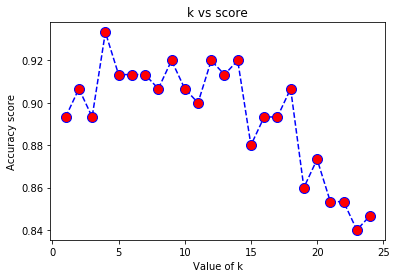

In [142]:
plt.plot(k_range,acc_score,color="blue",linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel("Value of k")
plt.ylabel("Accuracy score")
plt.title("k vs score")
plt.show()

In [ ]:
#accuracy is maximum at k=5